In [2]:
import numpy as np

In [3]:
path = '/hdd/rc_fq/mshouts_from_dara/'

In [4]:
def make_mudpy_fault(faultin,faultout,vr=2.6,rise_time_all=5.0,flip_strike=False):
    '''
    Convert to mudpy format fault
    '''
    from numpy import genfromtxt,ones,c_,savetxt
    f=genfromtxt(faultin)
    #Fault numbers
    n=f[:,0]
    #Coordinates, use the centroid
    lon=f[:,1]
    lat=f[:,2]
    depth=-f[:,3] #In positive km
    if flip_strike==True:
        strike=f[:,15]-180
    else:
        strike=f[:,15]
    dip=f[:,16]
    triangle=0.5*ones(len(f))
    if rise_time_all==None:
        rise_time=f[:,13]/vr  #Mean vertex length divided by rupture speed
    else:
        rise_time=rise_time_all*ones(len(lon))
    length=(f[:,14]**0.5)*1000  #Square root of the area (in m)
    #Put together and write file
    out=c_[n,lon,lat,depth,strike,dip,triangle,rise_time,length,length]
    h='No,lon,lat,depth(km),strike,dip,type,rise time(s),length(km),width(km)'
    savetxt(faultout,out,fmt='%i\t%10.6f\t%10.6f\t%12.8f\t%.2f\t%.2f\t%6.3f\t%6.3f\t%10.2f\t%10.2f',header=h)

In [5]:
make_mudpy_fault(path + 'ridgecrest_M7_fault1.mshout', path + 'largest_m7_segment.fault')

In [6]:
fault = np.genfromtxt(path + 'largest_m7_segment.fault')

In [7]:
fault[0]

array([ 1.00000000e+00, -1.17297740e+02,  3.55058930e+01,  1.80065277e+01,
        3.17400000e+02,  8.99000000e+01,  5.00000000e-01,  5.00000000e+00,
        1.93649000e+03,  1.93649000e+03])

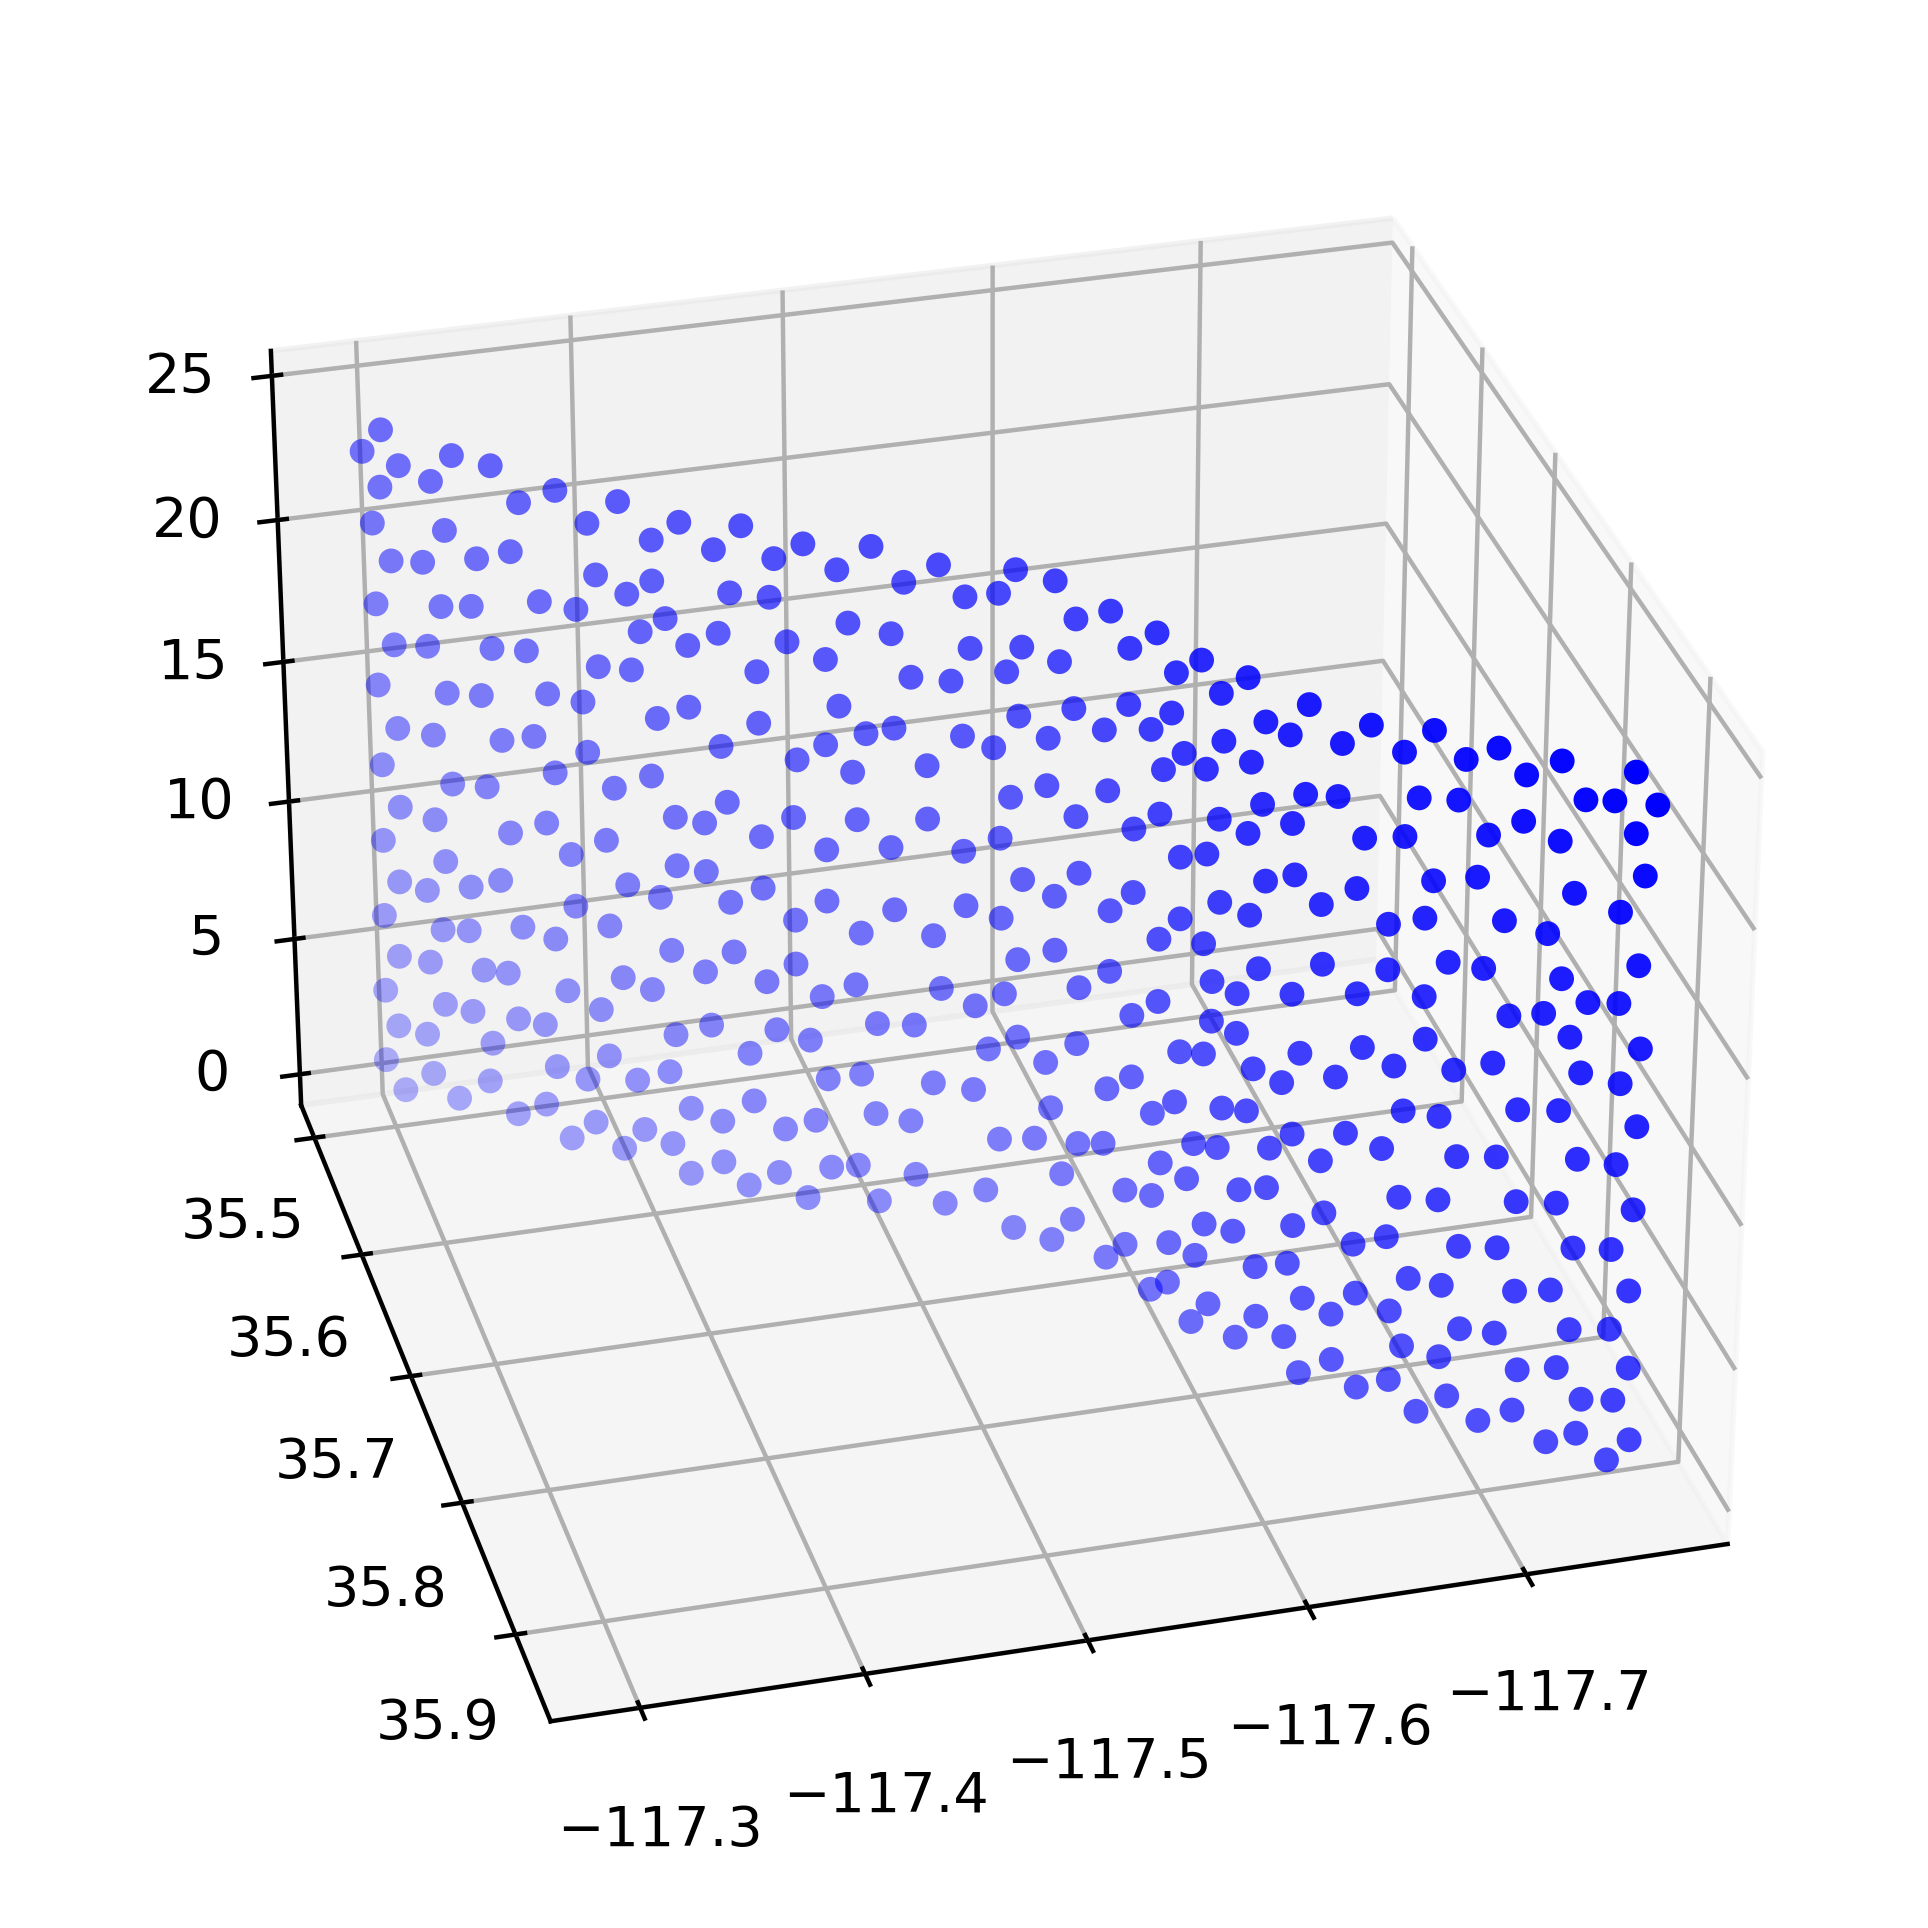

In [8]:
fig = plt.figure(figsize = (10, 6), dpi = 400)
ax = fig.add_subplot(111, projection='3d')
# ax.set_title('M7.1 Ridgecrest earthquake fault (3D view)')

p = ax.scatter(fault[:,1],fault[:,2], fault[:,3], c='blue', marker='o', s=20, lw=0, label = 'Subfaults')

# ax.set_xlabel('Longitude', fontsize = 12)
# ax.invert_xaxis()
# ax.set_xticks([-117.3, -117.5, -117.7])
# ax.set_ylabel('Latitude', fontsize = 12)
# ax.set_yticks([35.6, 35.7, 35.8, 35.9])
# ax.invert_yaxis()
# ax.set_zlabel('Depth (km)', rotation = 0, fontsize = 12)

ax.view_init(azim = 75)

# cb = fig.colorbar(p)

# if plot_onset == False:
#     cb.set_label('Slip (m)', fontsize = 12)
# else:
#     cb.set_label('Onset time (s)')

# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.0, top=0.9, wspace=0, hspace=0)
# ax.legend()
